In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 

In [45]:
data=pd.read_csv(r'C:\Users\BHARGAVI\OneDrive\Documents\all_season_details.csv')

C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_17944\4041228053.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'C:\Users\BHARGAVI\OneDrive\Documents\all_season_details.csv')


In [46]:
data

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242545,219020,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,lovely! Balaji's bowled a yorker outside off s...,NaN,NaN
242546,219030,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne steps down the track and throws his bat ...,NaN,<p>6 off 3 balls.</p>
242547,219050,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne reaches out for a full ball and squeezes...,NaN,<p>Three to win off two balls.</p>
242548,219040,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,what has he done! Balaji has bowled a wide out...,<p>Rajasthan need two runs a ball. Balaji from...,NaN


In [47]:
data.isnull().sum()

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [48]:
data.shape

(242550, 45)

In [49]:
data.size

10914750

In [50]:
data.describe()

,comment_id,season,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,242550.000000,242067.000000,2.425500e+05,242550.000000,242550.000000,242550.000000,242550.000000,2.425500e+05,242550.000000,242550.000000,...,242550.000000,242550.000000,2.297090e+05,229709.000000,229709.000000,229709.000000,229709.000000,1.188000e+04,11880.000000,11880.000000
mean,86415.531767,2015.588048,8.701769e+05,1.483245,10.161678,3.483875,1.317901,2.503057e+05,18.047631,14.119819,...,16.551618,13.219233,3.151650e+05,2.198914,0.024483,16.235019,0.551868,2.635273e+05,18.815404,15.311869
std,79516.360959,4.639506,3.530671e+05,0.499720,5.658053,1.707451,1.612821,2.968806e+05,18.341545,11.905881,...,17.771899,11.892068,3.222056e+05,1.046243,0.155527,10.171336,0.773715,3.039915e+05,19.542348,12.695239
min,110.000000,2008.000000,3.359820e+05,1.000000,1.000000,1.000000,0.000000,4.292000e+03,0.000000,0.000000,...,0.000000,0.000000,4.508000e+03,0.100000,0.000000,0.000000,0.000000,4.292000e+03,0.000000,0.000000
25%,18040.000000,2012.000000,5.483150e+05,1.000000,5.000000,2.000000,0.000000,3.296600e+04,4.000000,5.000000,...,3.000000,4.000000,3.333500e+04,1.000000,0.000000,8.000000,0.000000,3.314100e+04,4.000000,5.000000
50%,29010.000000,2015.000000,8.298190e+05,1.000000,10.000000,3.000000,1.000000,5.291200e+04,12.000000,11.000000,...,11.000000,10.000000,2.655640e+05,2.000000,0.000000,14.000000,0.000000,2.118540e+05,12.000000,12.000000
75%,118060.000000,2020.000000,1.216506e+06,2.000000,15.000000,5.000000,1.000000,3.791430e+05,27.000000,20.000000,...,25.000000,20.000000,4.752810e+05,3.000000,0.000000,23.000000,1.000000,3.984390e+05,28.000000,22.000000
max,219080.000000,2023.000000,1.370353e+06,2.000000,20.000000,7.000000,7.000000,1.349361e+06,174.000000,73.000000,...,174.000000,73.000000,1.350792e+06,4.000000,2.000000,70.000000,5.000000,1.312645e+06,129.000000,69.000000


In [51]:
data.head(5)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [52]:
data.tail(5)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
242545,219020,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,lovely! Balaji's bowled a yorker outside off s...,NaN,NaN
242546,219030,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne steps down the track and throws his bat ...,NaN,<p>6 off 3 balls.</p>
242547,219050,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Warne reaches out for a full ball and squeezes...,NaN,<p>Three to win off two balls.</p>
242548,219040,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,what has he done! Balaji has bowled a wide out...,<p>Rajasthan need two runs a ball. Balaji from...,NaN
242549,219060,2008.0,336040,CSK v RR,CSK,RR,RR,2,20,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Balaji bowls a full toss angling into the left...,NaN,<p>Rajasthan need one off the final ball.</p>


In [53]:
data.isnull().sum()

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [54]:
batsman_columns=data[['batsman1_id','batsman1_name','batsman1_runs','batsman1_balls']]
batsman_columns

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
0,379140,Devon Conway,0,1
1,379140,Devon Conway,0,2
2,1060380,Ruturaj Gaikwad,0,1
3,1060380,Ruturaj Gaikwad,1,2
4,379140,Devon Conway,0,3
...,...,...,...,...
242545,8166,Shane Warne,7,7
242546,8166,Shane Warne,8,8
242547,8166,Shane Warne,9,9
242548,43265,Sohail Tanvir,6,5


In [55]:
batsman_columns.head(5)

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
0,379140,Devon Conway,0,1
1,379140,Devon Conway,0,2
2,1060380,Ruturaj Gaikwad,0,1
3,1060380,Ruturaj Gaikwad,1,2
4,379140,Devon Conway,0,3


In [56]:
data.columns.tolist()

['comment_id',
 'season',
 'match_id',
 'match_name',
 'home_team',
 'away_team',
 'current_innings',
 'innings_id',
 'over',
 'ball',
 'runs',
 'shortText',
 'isBoundary',
 'isWide',
 'isNoball',
 'batsman1_id',
 'batsman1_name',
 'batsman1_runs',
 'batsman1_balls',
 'bowler1_id',
 'bowler1_name',
 'bowler1_overs',
 'bowler1_maidens',
 'bowler1_runs',
 'bowler1_wkts',
 'batsman2_id',
 'batsman2_name',
 'batsman2_runs',
 'batsman2_balls',
 'bowler2_id',
 'bowler2_name',
 'bowler2_overs',
 'bowler2_maidens',
 'bowler2_runs',
 'bowler2_wkts',
 'wicket_id',
 'wkt_batsman_name',
 'wkt_bowler_name',
 'wkt_batsman_runs',
 'wkt_batsman_balls',
 'wkt_text',
 'isRetiredHurt',
 'text',
 'preText',
 'postText']

In [57]:
wicket_columns=data[['wicket_id','wkt_batsman_name','wkt_bowler_name','wkt_batsman_runs','wkt_batsman_balls']]
wicket_columns

,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
242545,NaN,NaN,NaN,NaN,NaN
242546,NaN,NaN,NaN,NaN,NaN
242547,NaN,NaN,NaN,NaN,NaN
242548,NaN,NaN,NaN,NaN,NaN


In [58]:
wicket_columns.head(15)

,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [59]:
batsman_columns.head(15)

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
0,379140,Devon Conway,0,1
1,379140,Devon Conway,0,2
2,1060380,Ruturaj Gaikwad,0,1
3,1060380,Ruturaj Gaikwad,1,2
4,379140,Devon Conway,0,3
5,379140,Devon Conway,0,4
6,1060380,Ruturaj Gaikwad,5,3
7,1060380,Ruturaj Gaikwad,5,4
8,1060380,Ruturaj Gaikwad,9,5
9,1060380,Ruturaj Gaikwad,10,6


In [60]:
batsman_columns.tail(15)

,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls
242535,43265,Sohail Tanvir,1,1
242536,43265,Sohail Tanvir,0,0
242537,8166,Shane Warne,1,3
242538,8166,Shane Warne,2,4
242539,43265,Sohail Tanvir,2,2
242540,8166,Shane Warne,3,5
242541,43265,Sohail Tanvir,4,3
242542,43265,Sohail Tanvir,5,4
242543,8166,Shane Warne,7,6
242544,43265,Sohail Tanvir,6,5


# BATSMAN RUNS,RUNS AND BOWLERS ANALYSIS

# Batsman wicket analysis

In [61]:
print("Batsman1 Wicket Maximun:", data['bowler1_wkts'].max())
print("Batsman1 Wicket Minimum:", data['bowler1_wkts'].min())
print("Batsman1 Wicket Summary:\n", data['bowler1_wkts'].describe())

Batsman1 Wicket Maximun: 6
Batsman1 Wicket Minimum: 0
Batsman1 Wicket Summary:
 count    242550.000000
mean          0.468262
std           0.728663
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: bowler1_wkts, dtype: float64


In [62]:
print("Batsman2 Wicket Maximun:", data['bowler2_wkts'].max())
print("Batsman2 Wicket Minimum:", data['bowler2_wkts'].min())
print("Batsman2 Wicket Summary:\n", data['bowler2_wkts'].describe())

Batsman2 Wicket Maximun: 5.0
Batsman2 Wicket Minimum: 0.0
Batsman2 Wicket Summary:
 count    229709.000000
mean          0.551868
std           0.773715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: bowler2_wkts, dtype: float64


# Batsman run analysis

In [63]:
print("Batsman1 Runs Maximun:", data['batsman1_runs'].max())
print("Batsman1 Runs Minimum:", data['batsman1_runs'].min())
print("Batsman1 Runs Summary:\n", data['batsman1_runs'].describe())

Batsman1 Runs Maximun: 174
Batsman1 Runs Minimum: 0
Batsman1 Runs Summary:
 count    242550.000000
mean         18.047631
std          18.341545
min           0.000000
25%           4.000000
50%          12.000000
75%          27.000000
max         174.000000
Name: batsman1_runs, dtype: float64


In [23]:
print("Batsman2 Runs Maximun:", data['batsman2_runs'].max())
print("Batsman2 Runs Minimum:", data['batsman2_runs'].min())
print("Batsman2 Runs Summary:\n", data['batsman2_runs'].describe())

Batsman2 Runs Maximun: 174
Batsman2 Runs Minimum: 0
Batsman2 Runs Summary:
 count    242550.000000
mean         16.551618
std          17.771899
min           0.000000
25%           3.000000
50%          11.000000
75%          25.000000
max         174.000000
Name: batsman2_runs, dtype: float64


# Runs analysis

In [64]:
print("Maximum Runs:", data['runs'].max())
print("Minimum Runs:", data['runs'].min())

Maximum Runs: 7
Minimum Runs: 0


In [65]:
print("Runs Summary:\n", data['runs'].describe())

Runs Summary:
 count    242550.000000
mean          1.317901
std           1.612821
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: runs, dtype: float64


# Runs per innings

In [66]:
data[['current_innings','runs']].head(15)

,current_innings,runs
0,CSK,0
1,CSK,1
2,CSK,0
3,CSK,1
4,CSK,0
5,CSK,0
6,CSK,4
7,CSK,0
8,CSK,4
9,CSK,1


In [67]:
runs_per_innings = data.groupby('current_innings')['runs'].sum()
print("Runs per Innings:\n", runs_per_innings)

Runs per Innings:
 current_innings
CSK      35859
DC       47870
GL        4842
GT        5678
KKR      36422
KXIP     29904
Kochi     1892
LSG       4822
MI       39291
PBKS      6977
PWI       6330
RCB      37492
RPS       4511
RR       31917
SRH      25850
Name: runs, dtype: int64


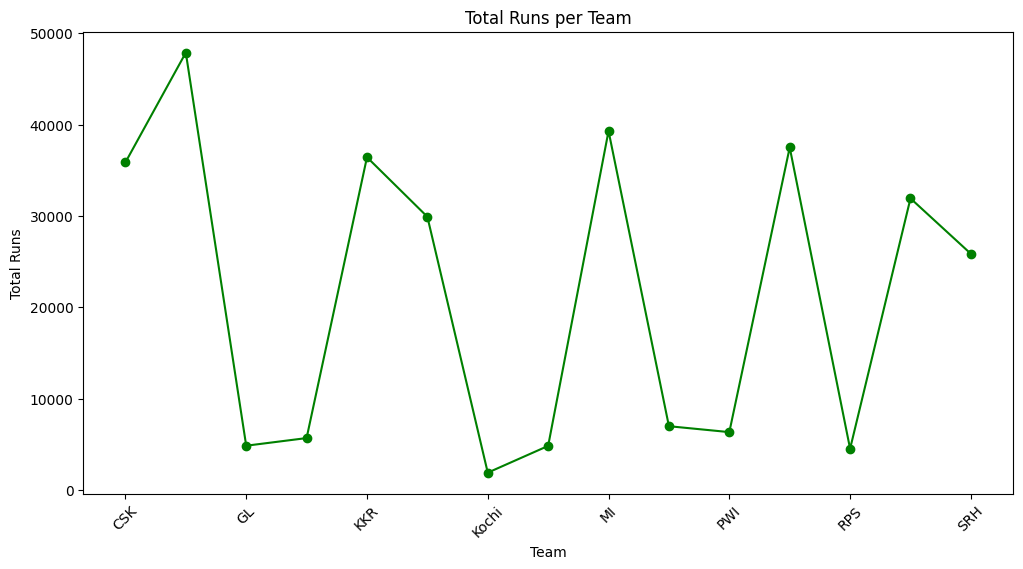

In [83]:
plt.figure(figsize=(12, 6))
runs_per_innings.plot(kind='line',marker='o', color='green')
plt.title("Total Runs per Team")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

In [29]:
data['batsman1_strike_rate'] = (data['batsman1_runs'] / data['batsman1_balls']) * 100
data['batsman2_strike_rate'] = (data['batsman2_runs'] / data['batsman2_balls']) * 100

# Mean Strike Rates
mean_strike_rate_batsman1 = data['batsman1_strike_rate'].mean()
mean_strike_rate_batsman2 = data['batsman2_strike_rate'].mean()

print(f"\nMean Strike Rate for Batsman 1: {mean_strike_rate_batsman1:.2f}")
print(f"Mean Strike Rate for Batsman 2: {mean_strike_rate_batsman2:.2f}")


Mean Strike Rate for Batsman 1: 114.95
Mean Strike Rate for Batsman 2: 113.01


In [30]:
data=data.drop(['text', 'preText', 'postText'],axis=1)

# Runs and wickets scored per over

In [31]:
runs_per_over = data.groupby('over')['runs'].sum()
wickets_per_over = data.groupby('over')['bowler1_wkts'].sum()
print("Runs per Over:\n", runs_per_over)
print("Wickets per Over:\n", wickets_per_over)

Runs per Over:
 over
1     12293
2     14858
3     16392
4     17043
5     17161
6     17083
7     13726
8     14788
9     15327
10    15193
11    15451
12    15765
13    16016
14    16357
15    16841
16    17050
17    17639
18    18192
19    17615
20    14867
Name: runs, dtype: int64
Wickets per Over:
 over
1      1341
2      1495
3      3840
4      3820
5      4544
6      4332
7      3177
8      3378
9      4072
10     4160
11     5458
12     5659
13     6648
14     7042
15     7888
16     8339
17     9330
18     9765
19    10609
20     8680
Name: bowler1_wkts, dtype: int64


In [32]:
performance_trends = data.groupby(['season', 'home_team'])['runs'].value_counts().fillna(0)
performance_trends
performance_trends.head(10)

season  home_team  runs
2008.0  CSK        1       846
                   0       785
                   4       260
                   2       156
                   6        98
                   3         9
                   5         9
                   7         2
        DC         1       662
                   0       491
Name: count, dtype: int64

# Dismissal kinds analysis

In [33]:
wicket_data = data.dropna(subset=['wkt_batsman_name'])
avg_runs_before_dismissal = wicket_data.groupby('wkt_batsman_name')['wkt_batsman_runs'].mean().sort_values(ascending=False)
print("\nAverage Runs Before Dismissal for Each Batsman:\n", avg_runs_before_dismissal.head())


Average Runs Before Dismissal for Each Batsman:
 wkt_batsman_name
Vivrant Sharma    69.000000
Devon Conway      36.000000
Sai Sudharsan     36.000000
Morne van Wyk     35.333333
Lendl Simmons     33.888889
Name: wkt_batsman_runs, dtype: float64


In [34]:
missing_values = data.isnull().sum() 
missing_values[missing_values > 0].sort_values(ascending=False)

wicket_id               230670
wkt_batsman_name        230670
wkt_bowler_name         230670
wkt_batsman_runs        230670
wkt_batsman_balls       230670
wkt_text                230670
batsman2_strike_rate     16917
bowler2_id               12841
bowler2_name             12841
bowler2_overs            12841
bowler2_maidens          12841
bowler2_runs             12841
bowler2_wkts             12841
batsman1_strike_rate       635
season                     483
batsman2_name                2
dtype: int64